In [1]:
from pathlib import Path
import sys

# Make this path be the project's "base" directory, so we can include modules
notebook_directory_ancestor = Path.cwd().resolve().parent.parent.parent.parent
print(notebook_directory_ancestor)
core_code_directory = notebook_directory_ancestor / "PythonLibraries" / "CoreCode"

is_core_code_directory_in_sys_path = str(core_code_directory) in sys.path
is_notebook_directory_ancestor_in_sys_path = str(notebook_directory_ancestor) in sys.path
print("Is CoreCode directory in sys.path?", is_core_code_directory_in_sys_path)
print("Is notebook directory's ancestor in sys.path?", is_notebook_directory_ancestor_in_sys_path)

if not is_core_code_directory_in_sys_path:
    sys.path.append(str(core_code_directory))

/InServiceOfX
Is CoreCode directory in sys.path? False
Is notebook directory's ancestor in sys.path? False


In [2]:
from corecode.FileIO import (GetJSONAsDict, get_filepaths)
from corecode.Utilities import (
    DataSubdirectories,
    LoadConfigurationFile)

In [3]:
data_sub_dirs = DataSubdirectories()

In [4]:
%time
from insightface.app import FaceAnalysis

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [5]:
%time
# prepare 'antelopev2'
app = FaceAnalysis(
    name='antelopev2',
    root=str(data_sub_dirs.ModelsDiffusion / "InstantX"),
    providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
    #providers=['CUDAExecutionProvider',])
app.prepare(ctx_id=0, det_size=(192, 192))

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.48 µs
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_max_tuning_duration_ms': '0', 'use_ep_level_unified_stream': '0', 'tunable_op_enable': '0', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'tunable_op_tuning_enable': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_external_alloc': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'has_user_compute_stream': '0', 'gpu_mem_limit': '18446744073709551615', 'device_id': '0'}}
find model: /Data/Models/Diffusion/InstantX/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {

In [6]:
%time
from diffusers.models import ControlNetModel
import torch

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [7]:
controlnet_path=data_sub_dirs.ModelsDiffusion / "InstantX" / "InstantID" / "ControlNetModel"
print(controlnet_path)

/Data/Models/Diffusion/InstantX/InstantID/ControlNetModel


In [8]:
#controlnet = ControlNetModel.from_pretrained(str(controlnet_path), torch_dtype=torch.float16)
controlnet = ControlNetModel.from_pretrained(str(controlnet_path))

In [9]:
print(sys.path)

['/InServiceOfX/Notebooks/ThirdParty/HuggingFace/diffusers', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/ThirdParty/accelerate/src', '/ThirdParty/datasets/src', '/ThirdParty/diffusers/src', '/ThirdParty/transformers/src', '/usr/local/lib/python3.10/dist-packages/nvfuser-0.1.1+gitunknown-py3.10-linux-x86_64.egg', '/usr/lib/python3/dist-packages', '/InServiceOfX/PythonLibraries/CoreCode', '/tmp/tmpzjpbz6hw']


In [10]:
instant_id_path = notebook_directory_ancestor.parent / "ThirdParty" / "InstantID"
if (instant_id_path.exists() and str(instant_id_path) not in sys.path):
    sys.path.append(str(instant_id_path))

In [11]:
from pipeline_stable_diffusion_xl_instantid import StableDiffusionXLInstantIDPipeline, draw_kps

In [12]:
model_subdir = data_sub_dirs.ModelsDiffusion / "stabilityai" / "stable-diffusion-xl-base-1.0"
print(model_subdir)
print(model_subdir.exists())

/Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
True


In [13]:
%time
pipe = StableDiffusionXLInstantIDPipeline.from_pretrained(
    str(model_subdir),
    controlnet=controlnet,
    #torch_dtype=torch.float16,
    local_files_only=True,)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 13.8 µs


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  scheduler
{}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  unet
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  tokenizer
{}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  tokenizer_2
{}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  vae
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  text_encoder
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_st

In [14]:
# See https://huggingface.co/blog/controlnet
# Note: When running enable_model_cpu_offload, do not manually move the pipeline to GPU with .to("cuda") -
# once CPU offloading is enabled, the pipeline automatically takes care of GPU memory management.
pipe.enable_model_cpu_offload()

In [15]:
# This didn't work, out of memory.
#%time
#pipe.cuda()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


In [ ]:
# Tried this model. assumed dimensions don't fit?
#model_subdir = data_sub_dirs.ModelsDiffusion / "runwayml" / "stable-diffusion-v1-5"
#print(model_subdir)
#print(model_subdir.exists())

In [15]:
#This didn't do anything to help
# pipe.enable_attention_slicing()

In [16]:
# This didn't work, out of memory.
#%time
#pipe.cuda()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 7.79 GiB of which 16.50 MiB is free. Process 73336 has 6.80 GiB memory in use. Of the allocated memory 5.58 GiB is allocated by PyTorch, and 203.03 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [14]:
face_adapter_path = data_sub_dirs.ModelsDiffusion / "InstantX" / "InstantID" / "ip-adapter.bin"
print(face_adapter_path.exists())

True


In [15]:
%time
pipe.load_ip_adapter_instantid(face_adapter_path, image_emb_dim=512, num_tokens=16)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.3 µs


In [16]:
import cv2
from diffusers.utils import load_image
import numpy as np

In [17]:
image_dir = data_sub_dirs.Data / "Private" / "Lady" / "Czech" / "Blonde" / "AndreaAndelova" / "Original"
print(image_dir.exists())
image_example_with_face = image_dir / "03 (1).jpg"
print(image_example_with_face.exists())
image_with_face = load_image(str(image_example_with_face))

True
True


In [18]:
# Prepare face embedding.
face_info = app.get(cv2.cvtColor(np.array(image_with_face), cv2.COLOR_RGB2BGR))

/ThirdParty/insightface/python-package/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [19]:
face_info = sorted(
    face_info,
    key=lambda x:(x['bbox'][2]-x['bbox'][0])*x['bbox'][3]-x['bbox'][1])[-1] # only use the maximum face

In [20]:
face_embedding_example = face_info['embedding']

In [21]:
face_kps = draw_kps(image_with_face, face_info['kps'])

In [22]:
pipe.set_ip_adapter_scale(0.8)

In [23]:
%time
prompt = "Beautiful blonde Czech girl in a sharp, portrait photo in a warm, luxurious, draped, bedroom."
negative_prompt = "(lowres, low quality, worst quality:1.2), (text:1.2), glitch, deformed, mutated, cross-eyed, ugly, disfigured (lowres, low quality, worst quality:1.2), (text:1.2), watermark, painting, drawing, illustration, glitch,deformed, mutated, cross-eyed, ugly, disfigured"
# Alternatively, have an empty negative prompt.
#negative_prompt = ""
# See InstantID/pipeline_stable_diffusion_xl_instantid.py
generated_image = pipe(
    prompt,
    image_embeds=face_embedding_example,
    image=face_kps,
    controlnet_conditioning_scale=0.8,
    ).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

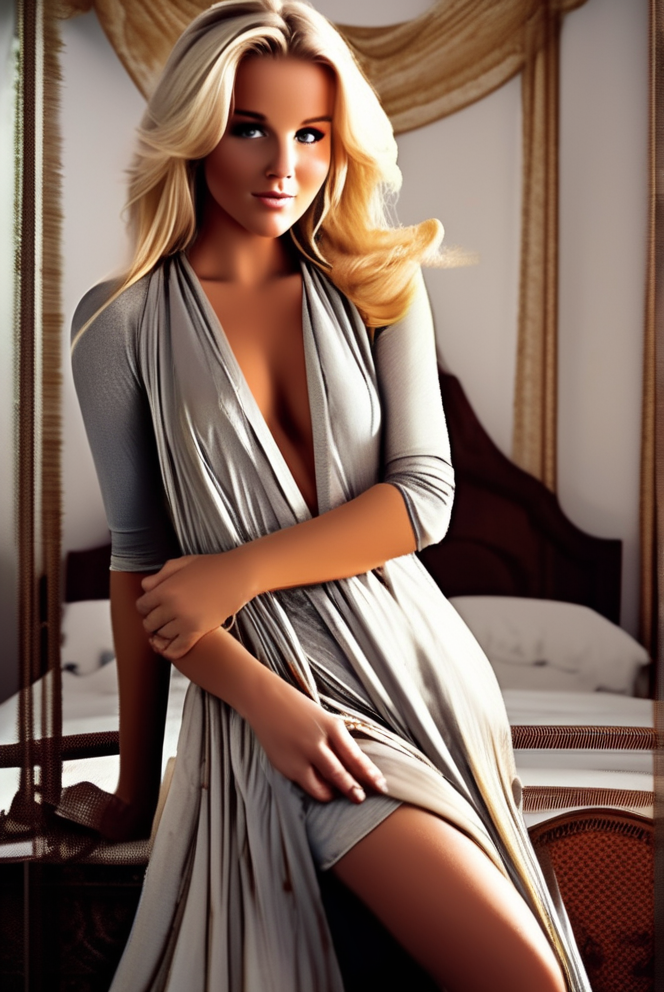

In [24]:
generated_image.show()

In [25]:
%time
prompt = "Beautiful blonde, topless, Czech girl, with her voluptuous breasts out, in a sharp, portrait photo in a warm, luxurious, draped, bedroom."
negative_prompt = "(lowres, low quality, worst quality:1.2), (text:1.2), glitch, deformed, mutated, cross-eyed, ugly, disfigured (lowres, low quality, worst quality:1.2), (text:1.2), watermark, painting, drawing, illustration, glitch,deformed, mutated, cross-eyed, ugly, disfigured"
# Alternatively, have an empty negative prompt.
#negative_prompt = ""
# See InstantID/pipeline_stable_diffusion_xl_instantid.py
generated_image2 = pipe(
    prompt,
    image_embeds=face_embedding_example,
    image=face_kps,
    # int, optional, defaults to 50,
    # number of denoising steps. More denoising steps usually lead to higher quality at expense of slower inference.
    num_inference_steps=10,
    # float, optional, defaults to 5.0. A higher guidance scale encourages model to generate images closely
    # linked to prompt at expense of lower image quality. Enabled when > 1.0
    guidance_scale=3,
    controlnet_conditioning_scale=0.8,
    # height in pixel of generated image.
    # height Optional, default = None
    height=768,
    # width Optional, default = None
    width=768,
    ).images[0]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
#g%time
prompt = "Beautiful blonde, topless, Czech girl, with her voluptuous breasts out, in a sharp, portrait photo in a warm, luxurious, draped, bedroom."
#negative_prompt = "(lowres, low quality, worst quality:1.2), (text:1.2), glitch, deformed, mutated, cross-eyed, ugly, disfigured (lowres, low quality, worst quality:1.2), (text:1.2), watermark, painting, drawing, illustration, glitch,deformed, mutated, cross-eyed, ugly, disfigured"
# Alternatively, have an empty negative prompt.
negative_prompt = ""
# See InstantID/pipeline_stable_diffusion_xl_instantid.py
pipe.set_ip_adapter_scale(0.5)
generated_image2 = pipe(
    prompt,
    image_embeds=face_embedding_example,
    image=face_kps,
    # int, optional, defaults to 50,
    # number of denoising steps. More denoising steps usually lead to higher quality at expense of slower inference.
    num_inference_steps=20,
    # float, optional, defaults to 5.0. A higher guidance scale encourages model to generate images closely
    # linked to prompt at expense of lower image quality. Enabled when > 1.0
    guidance_scale=3,
    controlnet_conditioning_scale=0.8,
    # height in pixel of generated image.
    # height Optional, default = None
    #height=768,
    # width Optional, default = None
    #width=768,
    ).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]